C:\Users\valuv\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros (según recall abandono): {'clf__ccp_alpha': 1e-09, 'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_impurity_decrease': 1e-09, 'clf__min_samples_leaf': 5}


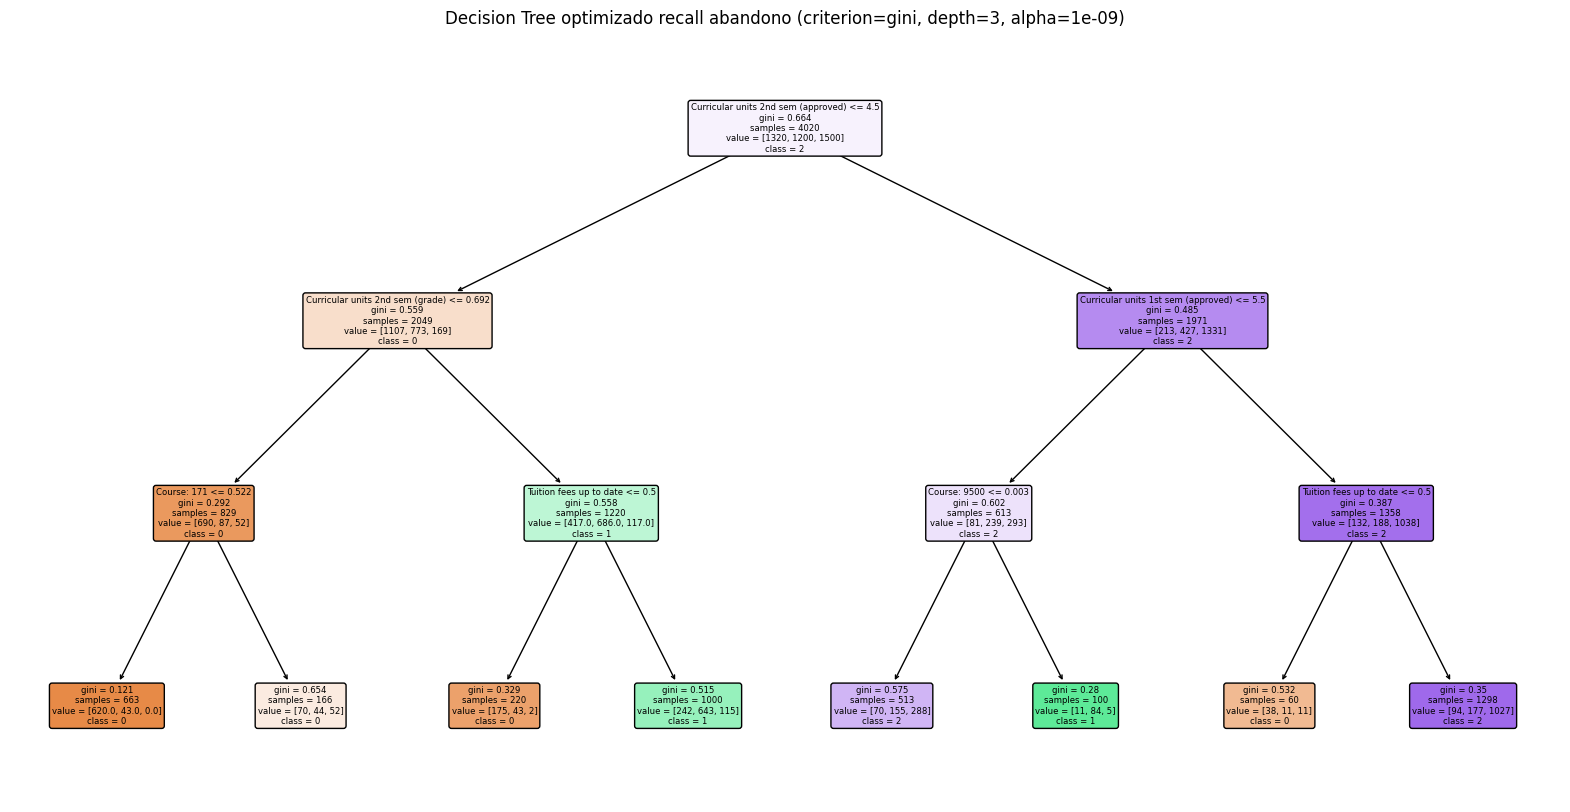


--- Test (recall abandono) ---
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       440
           1       0.60      0.55      0.57       400
           2       0.72      0.86      0.78       500

    accuracy                           0.70      1340
   macro avg       0.69      0.69      0.69      1340
weighted avg       0.70      0.70      0.69      1340

Matriz de confusión (test):
[[288  99  53]
 [ 65 219 116]
 [ 22  48 430]]


In [85]:


import pandas as pd
import numpy as np
#from limpieza import eliminar_duplicados, imputar_valores, codificar_variables
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score
import matplotlib.pyplot as plt

# 1. Carga y limpieza de datos
# ----------------------------
df = pd.read_csv('data_resampled.csv')

# 2. División del dataset (60% train, 20% val, 20% test)
# -------------------------------------------------------
X = df.drop('Target', axis=1)
y = df['Target']
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
)

# 3. Definición del Pipeline
# --------------------------
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

# 4. GridSearch de hiperparámetros (selección según recall de clase 'abandono')
# -----------------------------------------------------------------------------
# Definimos un scorer que maximice el recall de la clase 0 (abandono)
abandono_recall = make_scorer(recall_score, pos_label=0)
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__min_samples_leaf': [5, 10, 20],
    'clf__min_impurity_decrease': [1e-9, 1e-3, 1e-2],
    'clf__ccp_alpha': np.linspace(1e-9, 0.001, 1)
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=abandono_recall,
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Mejores parámetros (según recall abandono):", grid.best_params_)

# 5. Visualización del árbol seleccionado
# ---------------------------------------
plt.figure(figsize=(20, 10))
plot_tree(
    best_model.named_steps['clf'],
    feature_names=X.columns,
    class_names=[str(c) for c in best_model.named_steps['clf'].classes_],
    filled=True, rounded=True
)
plt.title(
    f"Decision Tree optimizado recall abandono (criterion={best_model.named_steps['clf'].get_params()['criterion']}, "
    f"depth={best_model.named_steps['clf'].get_params()['max_depth']}, "
    f"alpha={best_model.named_steps['clf'].get_params()['ccp_alpha']})"
)
plt.savefig("decision_tree.svg")
plt.show()

# 6. Evaluación en validación
# ----------------------------
#y_val_pred = best_model.predict(X_val)
#print("\n--- Validación (recall abandono) ---")
#print(classification_report(y_val, y_val_pred))
#print("Matriz de confusión (val):")
#print(confusion_matrix(y_val, y_val_pred))

# 7. Evaluación final en test
# ---------------------------
y_test_pred = best_model.predict(X_test)
print("\n--- Test (recall abandono) ---")
print(classification_report(y_test, y_test_pred))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_test_pred))


C:\Users\valuv\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Mejores parámetros (según recall abandono): {'clf__ccp_alpha': 1e-09, 'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_impurity_decrease': 1e-09, 'clf__min_samples_leaf': 5}


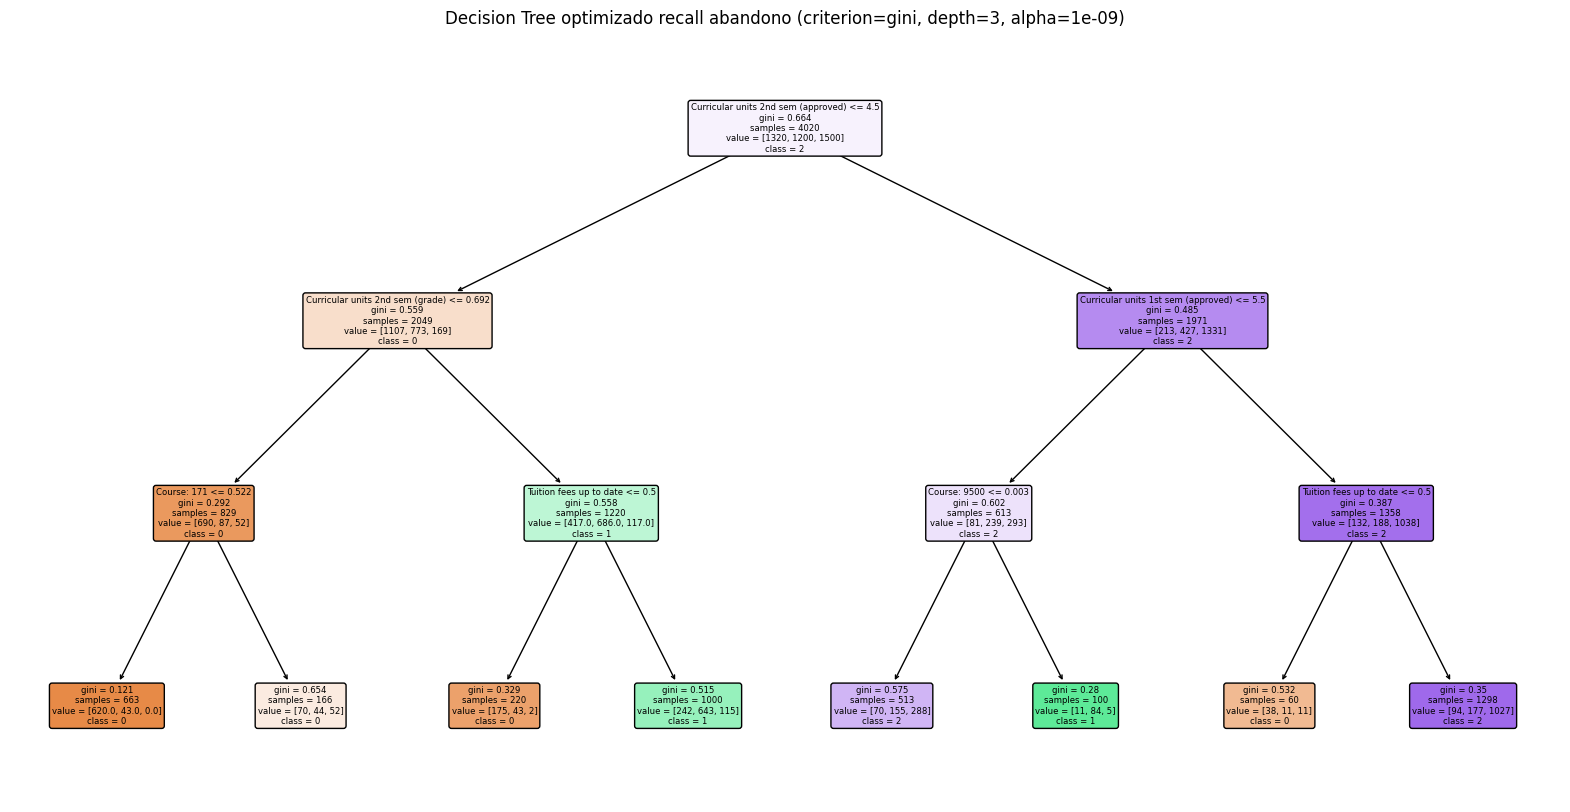


--- Test (recall abandono) ---
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       440
           1       0.60      0.55      0.57       400
           2       0.72      0.86      0.78       500

    accuracy                           0.70      1340
   macro avg       0.69      0.69      0.69      1340
weighted avg       0.70      0.70      0.69      1340

Matriz de confusión (test):
[[288  99  53]
 [ 65 219 116]
 [ 22  48 430]]


In [84]:


import pandas as pd
import numpy as np
#from limpieza import eliminar_duplicados, imputar_valores, codificar_variables
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, recall_score
import matplotlib.pyplot as plt

# 1. Carga y limpieza de datos
# ----------------------------
df = pd.read_csv('data_resampled.csv')

# 2. División del dataset (60% train, 20% val, 20% test)
# -------------------------------------------------------
X = df.drop('Target', axis=1)
y = df['Target']
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
#X_train, X_val, y_train, y_val = train_test_split(
#    X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42
#)

# 3. Definición del Pipeline
# --------------------------
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

# 4. GridSearch de hiperparámetros (selección según recall de clase 'abandono')
# -----------------------------------------------------------------------------
# Definimos un scorer que maximice el recall de la clase 0 (abandono)
abandono_recall = make_scorer(recall_score, pos_label=0)
param_grid = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7, 9],
    'clf__min_samples_leaf': [5, 10, 20],
    'clf__min_impurity_decrease': [1e-9, 1e-3, 1e-2],
    'clf__ccp_alpha': np.linspace(1e-9, 0.001, 1)
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring=abandono_recall,
    n_jobs=-1
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Mejores parámetros (según recall abandono):", grid.best_params_)

# 5. Visualización del árbol seleccionado
# ---------------------------------------
plt.figure(figsize=(20, 10))
plot_tree(
    best_model.named_steps['clf'],
    feature_names=X.columns,
    class_names=[str(c) for c in best_model.named_steps['clf'].classes_],
    filled=True, rounded=True
)
plt.title(
    f"Decision Tree optimizado recall abandono (criterion={best_model.named_steps['clf'].get_params()['criterion']}, "
    f"depth={best_model.named_steps['clf'].get_params()['max_depth']}, "
    f"alpha={best_model.named_steps['clf'].get_params()['ccp_alpha']})"
)
plt.savefig("decision_tree.svg")
plt.show()

# 6. Evaluación en validación
# ----------------------------
#y_val_pred = best_model.predict(X_val)
#print("\n--- Validación (recall abandono) ---")
#print(classification_report(y_val, y_val_pred))
#print("Matriz de confusión (val):")
#print(confusion_matrix(y_val, y_val_pred))

# 7. Evaluación final en test
# ---------------------------
y_test_pred = best_model.predict(X_test)
print("\n--- Test (recall abandono) ---")
print(classification_report(y_test, y_test_pred))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_test_pred))


In [ ]:

# 5. Visualización del árbol podado
# ----------------------------------
plt.figure(figsize=(20, 10))
plot_tree(
    best_model.named_steps['clf'],
    feature_names=X.columns,
    class_names=[str(c) for c in best_model.named_steps['clf'].classes_],
    filled=True,
    rounded=True
)
plt.title(
    f"Decision Tree (criterion={best_model.named_steps['clf'].get_params()['criterion']}, "
    f"depth={best_model.named_steps['clf'].get_params()['max_depth']}, "
    f"alpha={best_model.named_steps['clf'].get_params()['ccp_alpha']})"
)
plt.savefig("decision_tree.svg")
plt.show()
# evaluación del modelo
print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)
print("Mejor puntuación (f1_macro):")
print(grid.best_score_)
print("Número de nodos hoja:")
print(best_model.named_steps['clf'].get_n_leaves())
print("Número de nodos internos:")
print(best_model.named_steps['clf'].tree_.node_count)
print("Profundidad del árbol:")
print(best_model.named_steps['clf'].get_depth())
# 5. Evaluación en entrenamiento

# ----------------------------
y_train_pred = best_model.predict(X_train)
print("\n--- Entrenamiento ---")
print(classification_report(y_train, y_train_pred))
print("Matriz de confusión (train):")
print(confusion_matrix(y_train, y_train_pred))


# 6. Evaluación en validación
# ----------------------------
y_val_pred = best_model.predict(X_val)
print("\n--- Validación ---")
print(classification_report(y_val, y_val_pred))
print("Matriz de confusión (val):")
print(confusion_matrix(y_val, y_val_pred))

# 7. Evaluación final en test
# ---------------------------
y_test_pred = best_model.predict(X_test)
print("\n--- Test ---")
print(classification_report(y_test, y_test_pred))
print("Matriz de confusión (test):")
print(confusion_matrix(y_test, y_test_pred))



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report


# 1) Lectura de datos
df = pd.read_csv('data_resampled.csv')

# 2) Definición de X e y
TARGET_COL = 'Target'
TARGET_NAMES = ['Dropout', 'Enrolled', 'Graduate']

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]


# 3) División en train+val / test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# 4) División interna train / val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,        # 0.25 * 0.8 = 0.20 global → train:60%, val:20%, test:20%
    stratify=y_trainval,
    random_state=42
)

# Si X_test es un ndarray, lo reconstruimos como DataFrame
if not hasattr(X_test, "columns"):
    X_test = pd.DataFrame(X_test, columns=feature_names)

# Contar el desbalanceo de clases
print("Distribución de clases:")
print(y.value_counts(normalize=True))


# 5) Definición del scorer para recall de Dropout (clase 0)
def recall_dropout(y_true, y_pred):
    # average=None devuelve array [recall_clase0, recall_1, recall_2]
    return recall_score(y_true, y_pred, average=None)[0]

dropout_scorer = make_scorer(recall_dropout)



# 6) Grid search preliminar (sin poda) para acotar hiperparámetros
param_grid = {
    'max_depth':      [3, 5, 7],
    'min_samples_leaf': [10, 20, 30, 50],
    'min_samples_split':[10, 20, 30, 50],
}
best_cfg = {'score': -np.inf}


for cfg in ParameterGrid(param_grid):
    clf = DecisionTreeClassifier(
        criterion='gini',
        **cfg,
        random_state=42
    ).fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    score = recall_dropout(y_val, y_val_pred)
    if score > best_cfg['score']:
        best_cfg = {**cfg, 'score': score}

print("Mejor configuración pre-poda:", best_cfg)


# accuracy
print("\nAccuracy del mejor modelo:")
clf = DecisionTreeClassifier(
    criterion='gini',
    min_samples_leaf=best_cfg['min_samples_leaf'],
    min_samples_split=best_cfg['min_samples_split'],
    max_depth=best_cfg['max_depth'],
    random_state=42
).fit(X_train, y_train)
y_val_pred = clf.predict(X_val)
print(accuracy_score(y_val, y_val_pred))

print("\nMatriz de confusión del mejor modelo:")
cm = confusion_matrix(y_val, y_val_pred)
cm_df = pd.DataFrame(cm, index=TARGET_NAMES, columns=TARGET_NAMES)
cm_df.index.name = 'Real'
cm_df.columns.name = 'Predicción'
plt.figure(figsize=(8, 6))
plt.title('Matriz de confusión')

print("\nReporte de clasificación del mejor modelo:")
print(classification_report(y_val, y_val_pred, target_names=TARGET_NAMES))
plt.imshow(cm_df, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(np.arange(len(TARGET_NAMES)), TARGET_NAMES, rotation=45)
plt.yticks(np.arange(len(TARGET_NAMES)), TARGET_NAMES)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.show()

plt.figure(figsize=(25,15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=TARGET_NAMES,
    filled=True,
    fontsize=1,
    rounded=True
)
plt.title('Árbol de decisión (sin poda)')
plt.savefig('arboles/arbol_gini_decision.svg', format='svg')
plt.show()


clf_full = DecisionTreeClassifier(
    criterion='gini',
    max_depth=best_cfg['max_depth'],
    min_samples_leaf=best_cfg['min_samples_leaf'],
    min_samples_split=best_cfg['min_samples_split'],
    random_state=42
).fit(X_train, y_train)

path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]   # descartamos último alpha trivial


alpha_scores = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        criterion='gini',
        ccp_alpha=alpha,
        min_samples_leaf=best_cfg['min_samples_leaf'],
        min_samples_split=best_cfg['min_samples_split'],
        max_depth=best_cfg['max_depth'],
        random_state=42
    )
    cv_scores = cross_val_score(
        clf, X_train, y_train,
        cv=5,
        scoring=dropout_scorer,
        error_score=np.nan
    )
    alpha_scores.append((alpha, np.nanmean(cv_scores)))

    best_alpha, best_alpha_score = max(alpha_scores, key=lambda x: x[1])
print(f"Mejor ccp_alpha: {best_alpha:.5f} con recall_dropout CV={best_alpha_score:.4f}")


y_test_pred = final_clf.predict(X_test)
print("\n🎯 Accuracy en test:", round(accuracy_score(y_test, y_test_pred),4))
print("\n↪ Recall por clase:")
recalls = recall_score(y_test, y_test_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")

print("\n📊 Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))
print("\n📄 Classification report:\n",
      classification_report(y_test, y_test_pred, target_names=TARGET_NAMES))

plt.figure(figsize=(30,20))
plot_tree(
    final_clf,
    feature_names=X.columns,
    class_names=TARGET_NAMES,
    filled=True,
    fontsize=1,
    rounded=True
)
plt.title(f"Árbol podado (ccp_alpha={best_alpha:.5f})")
plt.savefig('arboles/arbol_podado.svg', format='svg')
plt.show()


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterGrid, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report

# 1) Lectura de datos
df = pd.read_csv('data_resampled.csv')

# 2) Definición de X, y y nombres de características
TARGET_COL = 'Target'
TARGET_NAMES = ['Dropout', 'Enrolled', 'Graduate']

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]
feature_names = X.columns.to_list()

# 3) División en train+val / test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# 4) División interna train / val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,        # 0.25 * 0.8 = 0.20 global → train:60%, val:20%, test:20%
    stratify=y_trainval,
    random_state=42
)

# 5) Scorer personalizado: recall de la clase "Dropout" (índice 0)
def recall_dropout(y_true, y_pred):
    return recall_score(y_true, y_pred, average=None)[0]

dropout_scorer = make_scorer(recall_dropout)

# 6) Búsqueda preliminar (sin poda) para hiperparámetros de profundidad y muestras mínimas
param_grid = {
    'max_depth':         [5],
    'min_samples_leaf':  [5, 10, 20, 30, 50],
    'min_samples_split': [5, 10, 20, 30, 50],
}
best_cfg = {'score': -np.inf}

for cfg in ParameterGrid(param_grid):
    clf = DecisionTreeClassifier(
        criterion='gini',
        random_state=42,
        **cfg
    ).fit(X_train, y_train)
    score = recall_dropout(y_val, clf.predict(X_val))
    if score > best_cfg['score']:
        best_cfg = {**cfg, 'score': score}

print("Mejor configuración pre-poda:", best_cfg)

# 7) Entrena el árbol sin poda con la mejor configuración y valida
clf = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=best_cfg['max_depth'],
    min_samples_leaf=best_cfg['min_samples_leaf'],
    min_samples_split=best_cfg['min_samples_split']
).fit(X_train, y_train)


Mejor configuración pre-poda: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 50, 'score': 0.7272727272727273}


In [34]:

# Evaluación en entrenamiento
print("\n--- Evaluación en entrenamiento ---")
y_train_pred = clf.predict(X_train)
print("\nAccuracy en entrenamiento:", accuracy_score(y_train, y_train_pred))
print("\nMatriz de confusión (entrenamiento):")
cm = confusion_matrix(y_train, y_train_pred)
cm_df = pd.DataFrame(cm, index=TARGET_NAMES, columns=TARGET_NAMES)
print(cm_df)
print("\nClassification report (entrenamiento):")
print(classification_report(y_train, y_train_pred, target_names=TARGET_NAMES))

# Evaluación en validación
print("\n--- Evaluación en validación ---")
y_val_pred = clf.predict(X_val)
print("\nAccuracy en validación:", accuracy_score(y_val, y_val_pred))
print("\nMatriz de confusión (validación):")
cm = confusion_matrix(y_val, y_val_pred)
cm_df = pd.DataFrame(cm, index=TARGET_NAMES, columns=TARGET_NAMES)
print(cm_df)
print("\nClassification report (validación):")
print(classification_report(y_val, y_val_pred, target_names=TARGET_NAMES))

# Evaluación en test
print("\n--- Evaluación en test ---")
y_test_pred = clf.predict(X_test)
print("\nAccuracy en test:", accuracy_score(y_test, y_test_pred))
print("\nMatriz de confusión (test):")
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=TARGET_NAMES, columns=TARGET_NAMES)
print(cm_df)
print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred, target_names=TARGET_NAMES))





--- Evaluación en entrenamiento ---

Accuracy en entrenamiento: 0.7646766169154229

Matriz de confusión (entrenamiento):
          Dropout  Enrolled  Graduate
Dropout       967       214       139
Enrolled      131       782       287
Graduate       62       113      1325

Classification report (entrenamiento):
              precision    recall  f1-score   support

     Dropout       0.83      0.73      0.78      1320
    Enrolled       0.71      0.65      0.68      1200
    Graduate       0.76      0.88      0.82      1500

    accuracy                           0.76      4020
   macro avg       0.77      0.76      0.76      4020
weighted avg       0.77      0.76      0.76      4020


--- Evaluación en validación ---

Accuracy en validación: 0.7477611940298508

Matriz de confusión (validación):
          Dropout  Enrolled  Graduate
Dropout       320        80        40
Enrolled       58       249        93
Graduate       24        43       433

Classification report (validación):
   

In [30]:

plt.figure(figsize=(30, 24))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=TARGET_NAMES,
    filled=True,
    rounded=True,
    fontsize=1
)
plt.title('Árbol de decisión (sin poda)')
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [35]:

# 8) Poda de complejidad: búsqueda de ccp_alpha óptimo
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # descartamos el alpha más grande

alpha_scores = []
for alpha in ccp_alphas:
    pruned = DecisionTreeClassifier(
        criterion='gini',
        random_state=42,
        max_depth=best_cfg['max_depth'],
        min_samples_leaf=best_cfg['min_samples_leaf'],
        min_samples_split=best_cfg['min_samples_split'],
        ccp_alpha=alpha
    )
    scores = cross_val_score(
        pruned, X_train, y_train,
        cv=5,
        scoring=dropout_scorer,
        error_score=np.nan
    )
    alpha_scores.append((alpha, np.nanmean(scores)))

best_alpha, best_alpha_score = max(alpha_scores, key=lambda x: x[1])
print(f"\nMejor ccp_alpha: {best_alpha:.5f}, recall_dropout CV={best_alpha_score:.4f}")

# 9) Entrena el árbol final podado con ese ccp_alpha
final_clf = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=best_cfg['max_depth'],
    min_samples_leaf=best_cfg['min_samples_leaf'],
    min_samples_split=best_cfg['min_samples_split'],
    ccp_alpha=best_alpha
).fit(X_train, y_train)



Mejor ccp_alpha: 0.00307, recall_dropout CV=0.7136


In [36]:

# 10) Evaluación en entrenamiento
y_train_pred = final_clf.predict(X_train)
print("\n🎯 Accuracy en entrenamiento:", round(accuracy_score(y_train, y_train_pred), 4))
print("\n↪ Recall por clase (entrenamiento):")
for cls, r in zip(TARGET_NAMES, recall_score(y_train, y_train_pred, average=None)):
    print(f"   {cls}: {r:.4f}")
print("\n📊 Matriz de confusión (entrenamiento):")
print(pd.DataFrame(
    confusion_matrix(y_train, y_train_pred),
))
print("\n📄 Classification report (entrenamiento):")
print(classification_report(y_train, y_train_pred, target_names=TARGET_NAMES))



# 11) Evaluación en validación
y_val_pred = final_clf.predict(X_val)
print("\n🎯 Accuracy en validación:", round(accuracy_score(y_val, y_val_pred), 4))
print("\n↪ Recall por clase (validación):")
for cls, r in zip(TARGET_NAMES, recall_score(y_val, y_val_pred, average=None)):
    print(f"   {cls}: {r:.4f}")
print("\n📊 Matriz de confusión (validación):")
print(pd.DataFrame(
    confusion_matrix(y_val, y_val_pred),
    index=TARGET_NAMES, columns=TARGET_NAMES
))
print("\n📄 Classification report (validación):")
print(classification_report(y_val, y_val_pred, target_names=TARGET_NAMES))


# 12) Evaluación final en test
y_test_pred = final_clf.predict(X_test)
print("\n🎯 Accuracy en test:", round(accuracy_score(y_test, y_test_pred), 4))
print("\n↪ Recall por clase (test):")
for cls, r in zip(TARGET_NAMES, recall_score(y_test, y_test_pred, average=None)):
    print(f"   {cls}: {r:.4f}")

print("\n📊 Matriz de confusión (test):")
print(pd.DataFrame(
    confusion_matrix(y_test, y_test_pred),
    index=TARGET_NAMES, columns=TARGET_NAMES
))

print("\n📄 Classification report (test):")
print(classification_report(y_test, y_test_pred, target_names=TARGET_NAMES))




🎯 Accuracy en entrenamiento: 0.7532

↪ Recall por clase (entrenamiento):
   Dropout: 0.7424
   Enrolled: 0.6200
   Graduate: 0.8693

📊 Matriz de confusión (entrenamiento):
     0    1     2
0  980  206   134
1  173  744   283
2   81  115  1304

📄 Classification report (entrenamiento):
              precision    recall  f1-score   support

     Dropout       0.79      0.74      0.77      1320
    Enrolled       0.70      0.62      0.66      1200
    Graduate       0.76      0.87      0.81      1500

    accuracy                           0.75      4020
   macro avg       0.75      0.74      0.74      4020
weighted avg       0.75      0.75      0.75      4020


🎯 Accuracy en validación: 0.7448

↪ Recall por clase (validación):
   Dropout: 0.7432
   Enrolled: 0.6025
   Graduate: 0.8600

📊 Matriz de confusión (validación):
          Dropout  Enrolled  Graduate
Dropout       327        74        39
Enrolled       67       241        92
Graduate       29        41       430

📄 Classificatio

In [ ]:

plt.figure(figsize=(30, 25))
plot_tree(
    final_clf,
    feature_names=feature_names,
    class_names=TARGET_NAMES,
    filled=True,
    rounded=True,
    fontsize=1
)
plt.title(f"Árbol podado (ccp_alpha={best_alpha:.5f})")
plt.tight_layout()
plt.show()


Mejores parámetros con poda y leaf:: {'ccp_alpha': 0.0031622776601683794, 'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 20}, recall_dropout CV=0.7348

🎯 Accuracy en entrenamiento: 0.7532
   Dropout: 0.7424
   Enrolled: 0.6200
   Graduate: 0.8693

📊 Matriz de confusión:
 [[ 980  206  134]
 [ 173  744  283]
 [  81  115 1304]]

📄 Classification report:
               precision    recall  f1-score   support

     Dropout       0.79      0.74      0.77      1320
    Enrolled       0.70      0.62      0.66      1200
    Graduate       0.76      0.87      0.81      1500

    accuracy                           0.75      4020
   macro avg       0.75      0.74      0.74      4020
weighted avg       0.75      0.75      0.75      4020


🎯 Accuracy en validación: 0.7448
   Dropout: 0.7432
   Enrolled: 0.6025
   Graduate: 0.8600

📊 Matriz de confusión:
 [[327  74  39]
 [ 67 241  92]
 [ 29  41 430]]

📄 Classification report:
               precision    recall  f1-score   support

     

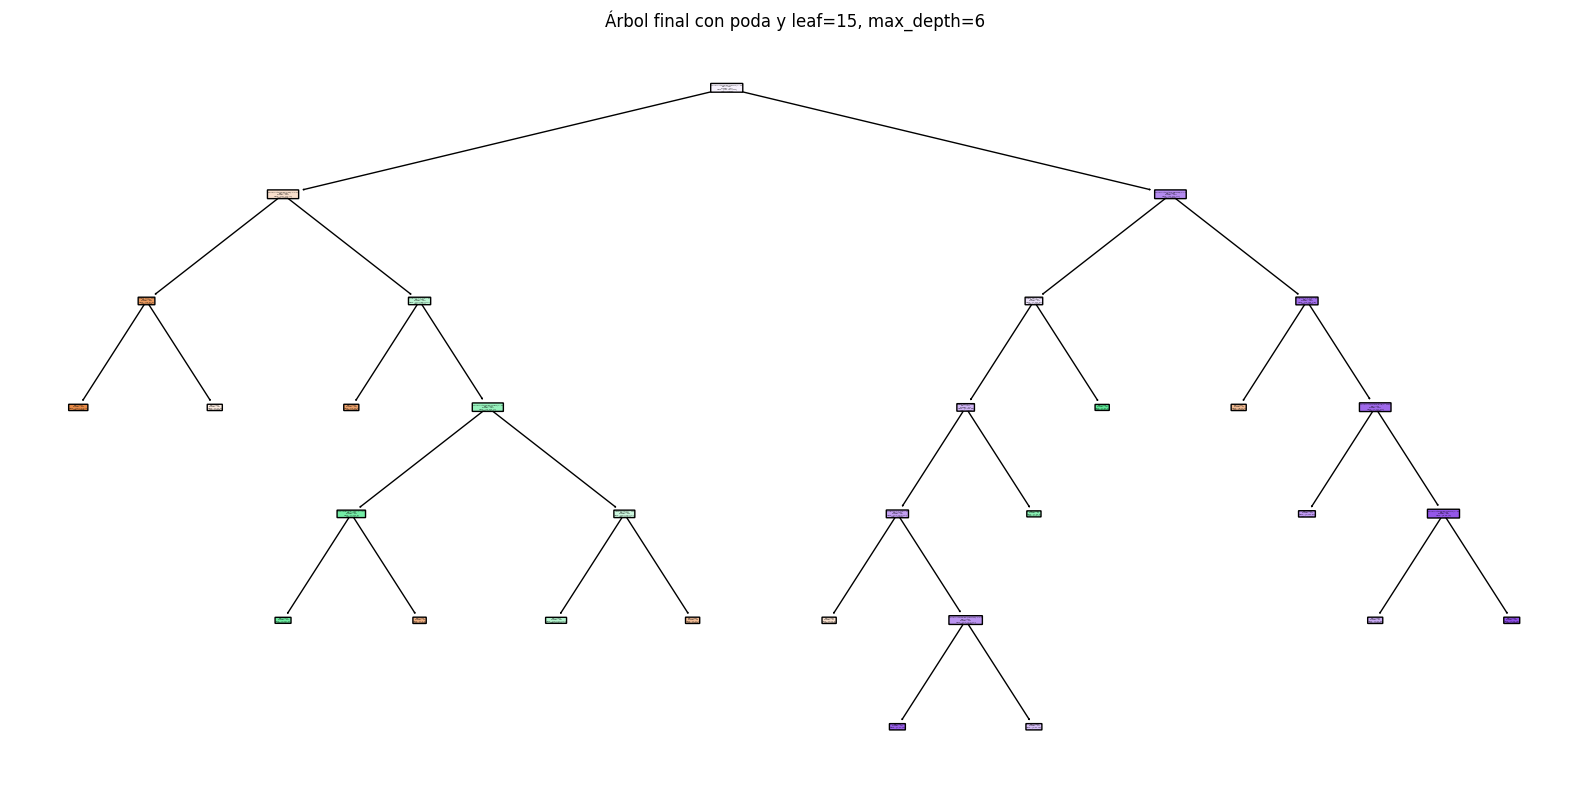

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report

# --- Datos y división ---
df = pd.read_csv('data_resampled.csv')
TARGET_COL = 'Target'
TARGET_NAMES = ['Dropout','Enrolled','Graduate']
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)

# --- Scorer personalizado: recall de Dropout (clase 0) ---
def recall_dropout(y_true, y_pred):
    return recall_score(y_true, y_pred, average=None)[0]
dropout_scorer = make_scorer(recall_dropout)

# --- Grid Search con poda (ccp_alpha) y ajuste de min_samples_leaf ---
param_grid = {
    'max_depth': [6, 8, 10],
    'min_samples_leaf': [10, 15, 20],  
    'min_samples_split': [20, 30, 50],    
    'ccp_alpha': np.logspace(-3, -2, 3)  # de [1e-3, 3e-3, 1e-2]}
}

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=dropout_scorer,
    cv=inner_cv,
    n_jobs=-1
)
# Ajuste en entrenamiento
grid.fit(X_train, y_train)

# Parámetros óptimos tras búsqueda conjunta
best_params = grid.best_params_
best_score_cv = grid.best_score_
print(f"Mejores parámetros con poda y leaf:: {best_params}, recall_dropout CV={best_score_cv:.4f}")

# Modelo final
final_clf = grid.best_estimator_

# ----Evaluación en entrenamiento----
y_train_pred = final_clf.predict(X_train)
print("\n🎯 Accuracy en entrenamiento:", round(accuracy_score(y_train, y_train_pred), 4))
recalls = recall_score(y_train, y_train_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_train, y_train_pred))
print("\n📄 Classification report:\n", classification_report(y_train, y_train_pred, target_names=TARGET_NAMES))


# -----Evaluación en validación-----
y_val_pred = final_clf.predict(X_val)
print("\n🎯 Accuracy en validación:", round(accuracy_score(y_val, y_val_pred), 4))
recalls = recall_score(y_val, y_val_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_val, y_val_pred))
print("\n📄 Classification report:\n", classification_report(y_val, y_val_pred, target_names=TARGET_NAMES))


# --- Evaluación final en test --
y_test_pred = final_clf.predict(X_test)
print("\n🎯 Accuracy en test:", round(accuracy_score(y_test, y_test_pred),4))
recalls = recall_score(y_test, y_test_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))
print("\n📄 Classification report:\n", classification_report(y_test, y_test_pred, target_names=TARGET_NAMES))

# --- Visualización árbol podado ---
plt.figure(figsize=(16,8))
plot_tree(
    final_clf,
    feature_names=X.columns,
    class_names=TARGET_NAMES,
    filled=True,
    rounded=True,
    fontsize=1,
    max_depth=best_params['max_depth']
)
plt.title('Árbol final con poda y leaf=15, max_depth='+str(best_params['max_depth']))
plt.tight_layout()
plt.show()


In [99]:
from sklearn.tree import _tree

def extract_dropout_rules_with_gini(clf, feature_names, target_class=0):
    tree = clf.tree_
    feat_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "leaf"
        for i in tree.feature
    ]
    paths = []
    path_conditions = []

    def recurse(node):
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name  = feat_name[node]
            thresh= tree.threshold[node]
            path_conditions.append(f"{name} ≤ {thresh:.4f}")
            recurse(tree.children_left[node])
            path_conditions.pop()
            path_conditions.append(f"{name} > {thresh:.4f}")
            recurse(tree.children_right[node])
            path_conditions.pop()
        else:
            counts = tree.value[node][0]
            pred   = counts.argmax()
            if pred == target_class:
                total = counts.sum()
                probs = counts / total
                gini_impurity = 1.0 - (probs**2).sum()
                # <-- aquí la clave: support real
                support = tree.n_node_samples[node]
                pct_target = probs[target_class]
                rule = " AND ".join(path_conditions) or "(root)"
                paths.append((rule, gini_impurity, support, pct_target))
        return

    recurse(0)
    return paths

# Extraer reglas para la clase "Dropout" (0)
dropout_paths = extract_dropout_rules_with_gini(final_clf, X.columns, target_class=0)
# Ordenar por gini
dropout_paths.sort(key=lambda x: x[1])
# contar las reglas
print(f"Reglas para la clase 'Dropout' (0): {len(dropout_paths)}")
# Imprimir las 10 reglas con menor gini
for rule, gini, support, pct_target in dropout_paths[:10]:
    print(f"Regla: {rule}, Gini: {gini:.4f}, Soporte: {support}, Pct Dropout: {pct_target:.4f}")


Reglas para la clase 'Dropout' (0): 4
Regla: Curricular units 2nd sem (approved) ≤ 4.5000 AND Curricular units 2nd sem (grade) ≤ 0.6916 AND Course: 171 ≤ 0.5221, Gini: 0.1213, Soporte: 663, Pct Dropout: 0.9351
Regla: Curricular units 2nd sem (approved) ≤ 4.5000 AND Curricular units 2nd sem (grade) > 0.6916 AND Tuition fees up to date ≤ 0.5000, Gini: 0.3290, Soporte: 220, Pct Dropout: 0.7955
Regla: Curricular units 2nd sem (approved) > 4.5000 AND Tuition fees up to date ≤ 0.5000, Gini: 0.5653, Soporte: 106, Pct Dropout: 0.5849
Regla: Curricular units 2nd sem (approved) ≤ 4.5000 AND Curricular units 2nd sem (grade) ≤ 0.6916 AND Course: 171 > 0.5221, Gini: 0.6538, Soporte: 166, Pct Dropout: 0.4217


Mejores parámetros con poda y leaf:: {'ccp_alpha': 0.01, 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5}, recall_dropout CV=0.7038

🎯 Accuracy en entrenamiento: 0.7366
   Dropout: 0.7023
   Enrolled: 0.6033
   Graduate: 0.8733

📊 Matriz de confusión:
 [[ 927  249  144]
 [ 158  724  318]
 [  70  120 1310]]

📄 Classification report:
               precision    recall  f1-score   support

     Dropout       0.80      0.70      0.75      1320
    Enrolled       0.66      0.60      0.63      1200
    Graduate       0.74      0.87      0.80      1500

    accuracy                           0.74      4020
   macro avg       0.73      0.73      0.73      4020
weighted avg       0.74      0.74      0.73      4020


🎯 Accuracy en validación: 0.7366
   Dropout: 0.7159
   Enrolled: 0.5950
   Graduate: 0.8680

📊 Matriz de confusión:
 [[315  83  42]
 [ 61 238 101]
 [ 24  42 434]]

📄 Classification report:
               precision    recall  f1-score   support

     Dropout       0.79

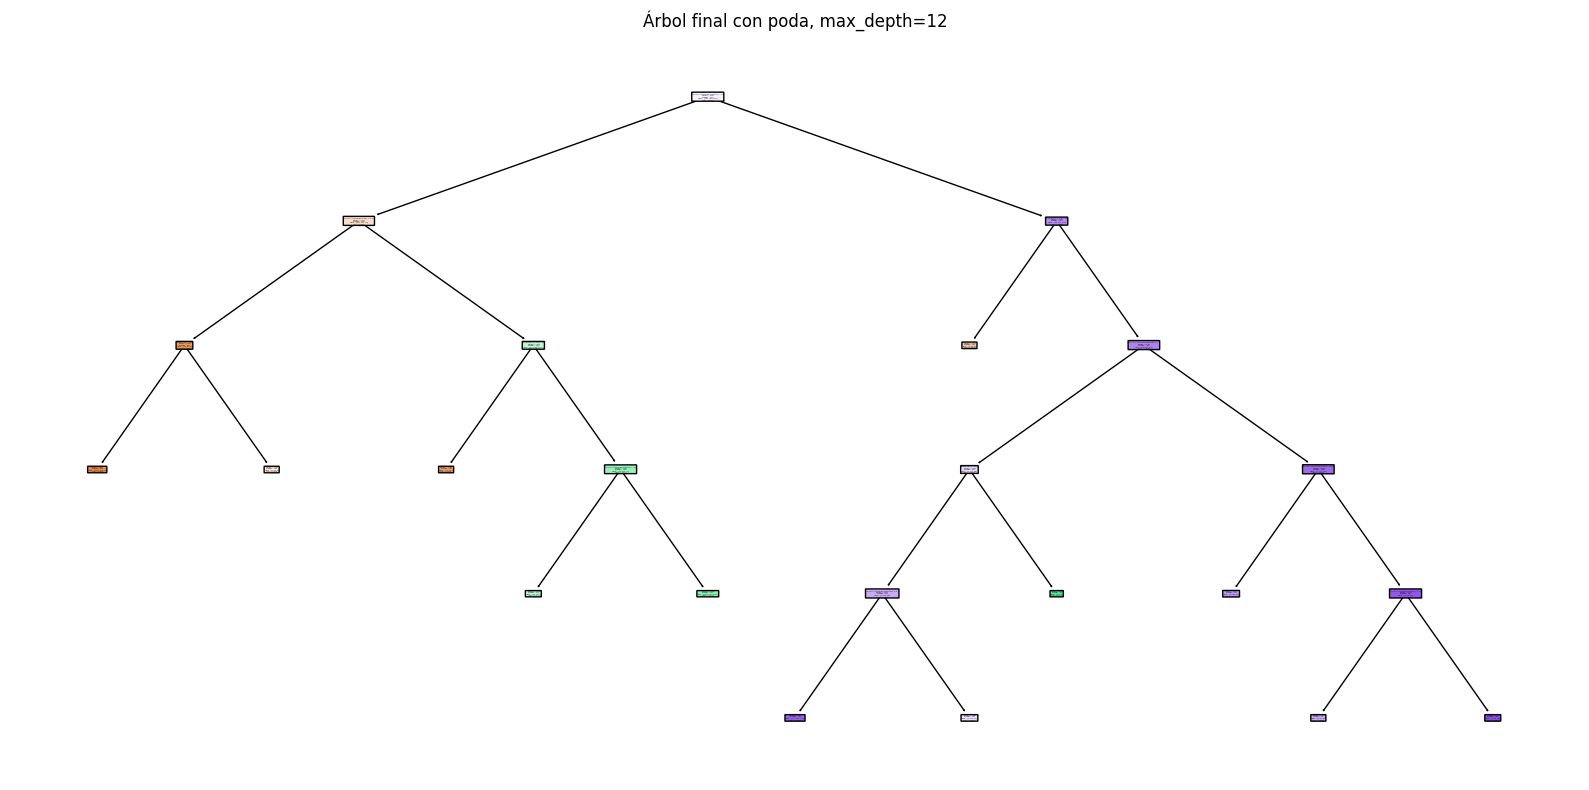

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report

# --- Datos y división ---
df = pd.read_csv('data_resampled.csv')
TARGET_COL = 'Target'
TARGET_NAMES = ['Dropout','Enrolled','Graduate']
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)

# --- Scorer personalizado: recall de Dropout (clase 0) ---
def recall_dropout(y_true, y_pred):
    return recall_score(y_true, y_pred, average=None)[0]
dropout_scorer = make_scorer(recall_dropout)

# --- Grid Search con poda (ccp_alpha) y ajuste de min_samples_leaf ---
param_grid = {
    'max_depth': [12, 15, None],
    'min_samples_leaf': [2, 5, 10],  # ligero aumento para mayor estabilidad
    'min_samples_split': [5, 10, 20],    # mantenemos valor previo
    'ccp_alpha': np.logspace(-2, -1, 3)  # de 0.001 a 0.01 en escala log
}

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=dropout_scorer,
    cv=inner_cv,
    n_jobs=-1
)
# Ajuste en entrenamiento
grid.fit(X_train, y_train)

# Parámetros óptimos tras búsqueda conjunta
best_params = grid.best_params_
best_score_cv = grid.best_score_
print(f"Mejores parámetros con poda y leaf:: {best_params}, recall_dropout CV={best_score_cv:.4f}")

# Modelo final
final_clf = grid.best_estimator_

# ----Evaluación en entrenamiento----
y_train_pred = final_clf.predict(X_train)
print("\n🎯 Accuracy en entrenamiento:", round(accuracy_score(y_train, y_train_pred), 4))
recalls = recall_score(y_train, y_train_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_train, y_train_pred))
print("\n📄 Classification report:\n", classification_report(y_train, y_train_pred, target_names=TARGET_NAMES))


# -----Evaluación en validación-----
y_val_pred = final_clf.predict(X_val)
print("\n🎯 Accuracy en validación:", round(accuracy_score(y_val, y_val_pred), 4))
recalls = recall_score(y_val, y_val_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_val, y_val_pred))
print("\n📄 Classification report:\n", classification_report(y_val, y_val_pred, target_names=TARGET_NAMES))


# --- Evaluación final en test --
y_test_pred = final_clf.predict(X_test)
print("\n🎯 Accuracy en test:", round(accuracy_score(y_test, y_test_pred),4))
recalls = recall_score(y_test, y_test_pred, average=None)
for idx, name in enumerate(TARGET_NAMES):
    print(f"   {name}: {recalls[idx]:.4f}")
print("\n📊 Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))
print("\n📄 Classification report:\n", classification_report(y_test, y_test_pred, target_names=TARGET_NAMES))

# --- Visualización árbol podado ---
plt.figure(figsize=(16,8))
plot_tree(
    final_clf,
    feature_names=X.columns,
    class_names=TARGET_NAMES,
    filled=True,
    rounded=True,
    fontsize=1,
    max_depth=best_params['max_depth']
)
plt.title('Árbol final con poda, max_depth='+str(best_params['max_depth']))
plt.savefig('arboles/arbol_podado_entropia.svg', format='svg')
plt.tight_layout()
plt.show()


In [100]:
from sklearn.tree import _tree
import math

def extract_dropout_rules_with_entropy(clf, feature_names, target_class=0):
    """
    Recorre el árbol y devuelve una lista de tuplas:
      (condiciones, entropy_impurity, support, proporción_clase_target)
    sólo para hojas que predicen target_class.
    """
    tree = clf.tree_
    feat_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "leaf"
        for i in tree.feature
    ]
    paths = []
    path_conditions = []

    def recurse(node):
        # Nodo interno: seguimos dividiendo
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name   = feat_name[node]
            thresh = tree.threshold[node]
            # Hijo izquierdo
            path_conditions.append(f"{name} ≤ {thresh:.4f}")
            recurse(tree.children_left[node])
            path_conditions.pop()
            # Hijo derecho
            path_conditions.append(f"{name} > {thresh:.4f}")
            recurse(tree.children_right[node])
            path_conditions.pop()
        else:
            # Hoja: calculamos predicción y métricas
            counts = tree.value[node][0]
            pred   = counts.argmax()
            if pred == target_class:
                total = counts.sum()
                probs = counts / total
                # Entropía con log₂
                entropy_impurity = -sum(p * math.log2(p) for p in probs if p > 0.0)
                # Soporte real (número de muestras en el nodo)
                support = tree.n_node_samples[node]
                pct_target = probs[target_class]
                rule = " AND ".join(path_conditions) or "(root)"
                paths.append((rule, entropy_impurity, support, pct_target))
        return

    recurse(0)
    return paths


# Extraer reglas para la clase "Dropout" (0)
dropout_paths = extract_dropout_rules_with_entropy(final_clf, X.columns, target_class=0)
# Ordenar por entropía
dropout_paths.sort(key=lambda x: x[1])
# contar las reglas
print(f"Reglas para la clase 'Dropout' (0): {len(dropout_paths)}")
# Imprimir las 10 reglas con menor entropía
for rule, entropy, support, pct_target in dropout_paths[:10]:
    print(f"Regla: {rule}, Entropía: {entropy:.4f}, Soporte: {support}, Pct Dropout: {pct_target:.4f}")

Reglas para la clase 'Dropout' (0): 4
Regla: Curricular units 2nd sem (approved) ≤ 4.5000 AND Curricular units 2nd sem (grade) ≤ 0.6916 AND Course: 171 ≤ 0.5221, Entropía: 0.3464, Soporte: 663, Pct Dropout: 0.9351
Regla: Curricular units 2nd sem (approved) ≤ 4.5000 AND Curricular units 2nd sem (grade) > 0.6916 AND Tuition fees up to date ≤ 0.5000, Entropía: 0.7846, Soporte: 220, Pct Dropout: 0.7955
Regla: Curricular units 2nd sem (approved) > 4.5000 AND Tuition fees up to date ≤ 0.5000, Entropía: 1.3716, Soporte: 106, Pct Dropout: 0.5849
Regla: Curricular units 2nd sem (approved) ≤ 4.5000 AND Curricular units 2nd sem (grade) ≤ 0.6916 AND Course: 171 > 0.5221, Entropía: 1.5576, Soporte: 166, Pct Dropout: 0.4217


In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score

# Scorer para recall de Dropout
dropout_scorer = make_scorer(lambda y_true, y_pred: recall_score(y_true, y_pred, average=None)[0])

param_grid = {
    'max_depth':         [3, 4, 5, 6, 8, 10, 12],           # cubre baja a alta complejidad
    'min_samples_leaf':  [5, 10, 15, 20, 30, 50],           # desde hojas pequeñas hasta muy grandes
    'min_samples_split': [5, 10, 20, 30, 50, 70],           # división más o menos exigente
    'ccp_alpha':         np.logspace(-4, -1, 10)            # poda muy ligera (1e-4) a muy agresiva (1e-1)
}

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(clf, param_grid, scoring=dropout_scorer, cv=cv, n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor recall_dropout CV:", grid.best_score_)


KeyboardInterrupt: 

Entropy best params: {'ccp_alpha': 0.0001, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 20} CV recall_dropout= 0.7561


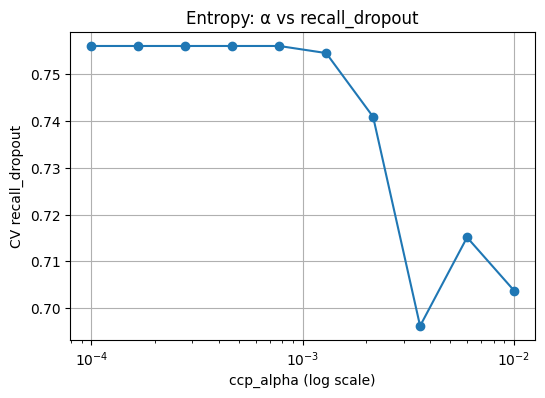

entropy best: {'ccp_alpha': 0.0001, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 20} CV recall= 0.7561
gini best: {'ccp_alpha': 0.0001, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 10} CV recall= 0.753
Entropy rules count: 70
Gini rules count: 86

Final Test Eval (Entropy):
Accuracy: 0.7403
Recall Dropout: 0.7341
Rules extracted: 70


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report
import math

# --- 1) Carga y división de datos ---
df = pd.read_csv('data_resampled.csv')
TARGET_COL = 'Target'
TARGET_NAMES = ['Dropout','Enrolled','Graduate']
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,
    stratify=y_trainval,
    random_state=42
)

# --- 2) Scorer personalizado ---
def recall_dropout(y_true, y_pred):
    return recall_score(y_true, y_pred, average=None)[0]
dropout_scorer = make_scorer(recall_dropout)

# --- 3) Búsqueda de hiperparámetros refine grid (Entropy) ---
param_grid_entropy = {
    'max_depth': [7, 9, 12],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 50],
    'ccp_alpha': np.logspace(-4, -2, 10)  # 1e-4 a 1e-2
}
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_entropy = GridSearchCV(
    estimator=clf_entropy,
    param_grid=param_grid_entropy,
    scoring=dropout_scorer,
    cv=cv,
    n_jobs=-1
)
grid_entropy.fit(X_train, y_train)
best_ent = grid_entropy.best_params_
best_score_ent = grid_entropy.best_score_
print("Entropy best params:", best_ent, "CV recall_dropout=", round(best_score_ent,4))

# --- 4) Curva de alpha vs recall_dropout (Entropy) ---
alphas = param_grid_entropy['ccp_alpha']
scores_ent = [
    cross_val_score(
        DecisionTreeClassifier(
            criterion='entropy',
            random_state=42,
            max_depth=best_ent['max_depth'],
            min_samples_leaf=best_ent['min_samples_leaf'],
            min_samples_split=best_ent['min_samples_split'],
            ccp_alpha=a
        ), X_train, y_train, cv=cv, scoring=dropout_scorer
    ).mean()
    for a in alphas
]
plt.figure(figsize=(6,4))
plt.semilogx(alphas, scores_ent, marker='o')
plt.xlabel('ccp_alpha (log scale)')
plt.ylabel('CV recall_dropout')
plt.title('Entropy: α vs recall_dropout')
plt.grid(True)
plt.show()

# --- 5) Nested CV comparando Entropy vs Gini ---
param_grid_common = {
    'max_depth': [7, 9, 12],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 50],
    'ccp_alpha': np.logspace(-4, -2, 10)
}
results = {}
for crit in ['entropy','gini']:
    clf = DecisionTreeClassifier(criterion=crit, random_state=42)
    grid = GridSearchCV(
        estimator=clf,
        param_grid=param_grid_common,
        scoring=dropout_scorer,
        cv=cv,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    results[crit] = (grid.best_params_, grid.best_score_)
    print(f"{crit} best:", results[crit][0], "CV recall=", round(results[crit][1],4))

# --- 6) Interpretabilidad: extracción de reglas Dropout y conteo ---
def extract_rules(clf, feature_names, target_class=0, use_entropy=True):
    tree = clf.tree_
    feat = [feature_names[i] if i!=_tree.TREE_UNDEFINED else 'leaf' for i in tree.feature]
    rules=[]; conditions=[]
    def recurse(n):
        if tree.feature[n]!=_tree.TREE_UNDEFINED:
            name=feat[n]; thr=tree.threshold[n]
            conditions.append(f"{name} ≤ {thr:.3f}")
            recurse(tree.children_left[n]); conditions.pop()
            conditions.append(f"{name} > {thr:.3f}")
            recurse(tree.children_right[n]); conditions.pop()
        else:
            vals=tree.value[n][0]; pred=vals.argmax()
            if pred==target_class:
                total=vals.sum(); p=vals/total
                if use_entropy:
                    impurity=-sum(pi*math.log2(pi) for pi in p if pi>0)
                else:
                    impurity=1-np.sum(p**2)
                rules.append((list(conditions), impurity, int(total), p[target_class]))
    recurse(0)
    return rules
# extraemos para el mejor entropy
best_clf_ent = grid_entropy.best_estimator_
rules_ent = extract_rules(best_clf_ent, X.columns, 0, use_entropy=True)
print(f"Entropy rules count: {len(rules_ent)}")
# extraemos para el mejor gini
best_clf_gini = GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=42), param_grid_common, scoring=dropout_scorer, cv=cv).fit(X_train, y_train).best_estimator_
rules_gini=extract_rules(best_clf_gini, X.columns,0,use_entropy=False)
print(f"Gini rules count: {len(rules_gini)}")

# --- 7) Evaluación final en Test del mejor modelo (elegir según recall_dropout) ---
# supongamos elegimos Entropy
final = best_clf_ent
print("\nFinal Test Eval (Entropy):")
y_pred = final.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Recall Dropout:", round(recall_score(y_test,y_pred,average=None)[0],4))
print("Rules extracted:", len(rules_ent))


Entropy best params: {'ccp_alpha': 0.0001, 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 20} CV recall_dropout= 0.7561


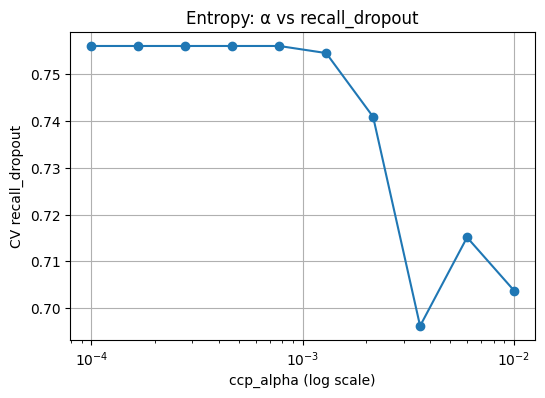

ENTROPY - params: {'ccp_alpha': 0.0001, 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 20}, Train recall=0.8652, Val recall=0.7644, Brecha train-val=0.1008


KeyError: 0

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, _tree
from sklearn.metrics import recall_score, make_scorer, accuracy_score, confusion_matrix, classification_report
import math

# --- 1) Carga y división de datos ---
df = pd.read_csv('data_resampled.csv')
TARGET_COL = 'Target'
TARGET_NAMES = ['Dropout','Enrolled','Graduate']
X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval,
    test_size=0.25,
    stratify=y_trainval,
    random_state=42
)

# --- 2) Scorer personalizado ---
def recall_dropout(y_true, y_pred):
    return recall_score(y_true, y_pred, average=None)[0]
dropout_scorer = make_scorer(recall_dropout)

# --- 3) Búsqueda de hiperparámetros refine grid (Entropy) ---
param_grid_entropy = {
    'max_depth': [7, 9, 12],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 50],
    'ccp_alpha': np.logspace(-4, -2, 10)  # 1e-4 a 1e-2
}
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_entropy = GridSearchCV(
    estimator=clf_entropy,
    param_grid=param_grid_entropy,
    scoring=dropout_scorer,
    cv=cv,
    n_jobs=-1
)
grid_entropy.fit(X_train, y_train)
best_ent = grid_entropy.best_params_
best_score_ent = grid_entropy.best_score_
print("Entropy best params:", best_ent, "CV recall_dropout=", round(best_score_ent,4))

# --- 4) Curva de alpha vs recall_dropout (Entropy) ---
alphas = param_grid_entropy['ccp_alpha']
scores_ent = [
    cross_val_score(
        DecisionTreeClassifier(
            criterion='entropy',
            random_state=42,
            max_depth=best_ent['max_depth'],
            min_samples_leaf=best_ent['min_samples_leaf'],
            min_samples_split=best_ent['min_samples_split'],
            ccp_alpha=a
        ), X_train, y_train, cv=cv, scoring=dropout_scorer
    ).mean()
    for a in alphas
]
plt.figure(figsize=(6,4))
plt.semilogx(alphas, scores_ent, marker='o')
plt.xlabel('ccp_alpha (log scale)')
plt.ylabel('CV recall_dropout')
plt.title('Entropy: α vs recall_dropout')
plt.grid(True)
plt.show()

# --- 5) Nested CV comparando Entropy vs Gini (con brecha train-val) ---
param_grid_common = {
    'max_depth': [7, 9, 12, 15],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [10, 20, 50],
    'ccp_alpha': np.logspace(-4, -2, 10)
}
results = {}
for crit in ['entropy','gini']:
    clf = DecisionTreeClassifier(criterion=crit, random_state=42)
    grid = GridSearchCV(
        estimator=clf,
        param_grid=param_grid_common,
        scoring=dropout_scorer,
        cv=cv,
        n_jobs=-1,
        return_train_score=True     # Para calcular brecha
    )
    grid.fit(X_train, y_train)
    train_mean = grid.cv_results_['mean_train_score'][grid.best_index_]
    valid_mean = grid.best_score_
    gap = train_mean - valid_mean
    results[crit] = {
        'best_params': grid.best_params_,
        'train_recall': round(train_mean,4),
        'val_recall': round(valid_mean,4),
        'brecha': round(gap,4)
    }
    print(f"{crit.upper()} - params: {results[crit]['best_params']}, "
          f"Train recall={results[crit]['train_recall']}, "
          f"Val recall={results[crit]['val_recall']}, "
          f"Brecha train-val={results[crit]['brecha']}"), results[crit][0], "CV recall=", round(results[crit][1],4)

# --- 6) Interpretabilidad: extracción de reglas Dropout y conteo ---
def extract_rules(clf, feature_names, target_class=0, use_entropy=True):
    tree = clf.tree_
    feat = [feature_names[i] if i!=_tree.TREE_UNDEFINED else 'leaf' for i in tree.feature]
    rules=[]; conditions=[]
    def recurse(n):
        if tree.feature[n]!=_tree.TREE_UNDEFINED:
            name=feat[n]; thr=tree.threshold[n]
            conditions.append(f"{name} ≤ {thr:.3f}")
            recurse(tree.children_left[n]); conditions.pop()
            conditions.append(f"{name} > {thr:.3f}")
            recurse(tree.children_right[n]); conditions.pop()
        else:
            vals=tree.value[n][0]; pred=vals.argmax()
            if pred==target_class:
                total=vals.sum(); p=vals/total
                if use_entropy:
                    impurity=-sum(pi*math.log2(pi) for pi in p if pi>0)
                else:
                    impurity=1-np.sum(p**2)
                rules.append((list(conditions), impurity, int(total), p[target_class]))
    recurse(0)
    return rules
# extraemos para el mejor entropy
best_clf_ent = grid_entropy.best_estimator_
rules_ent = extract_rules(best_clf_ent, X.columns, 0, use_entropy=True)
print(f"Entropy rules count: {len(rules_ent)}")
# extraemos para el mejor gini
best_clf_gini = GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=42), param_grid_common, scoring=dropout_scorer, cv=cv).fit(X_train, y_train).best_estimator_
rules_gini=extract_rules(best_clf_gini, X.columns,0,use_entropy=False)
print(f"Gini rules count: {len(rules_gini)}")

# --- 7) Evaluación final en Test del mejor modelo (elegir según recall_dropout) ---
# supongamos elegimos Entropy
final = best_clf_ent
print("\nFinal Test Eval (Entropy):")
y_pred = final.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
print("Recall Dropout:", round(recall_score(y_test,y_pred,average=None)[0],4))
print("Rules extracted:", len(rules_ent))


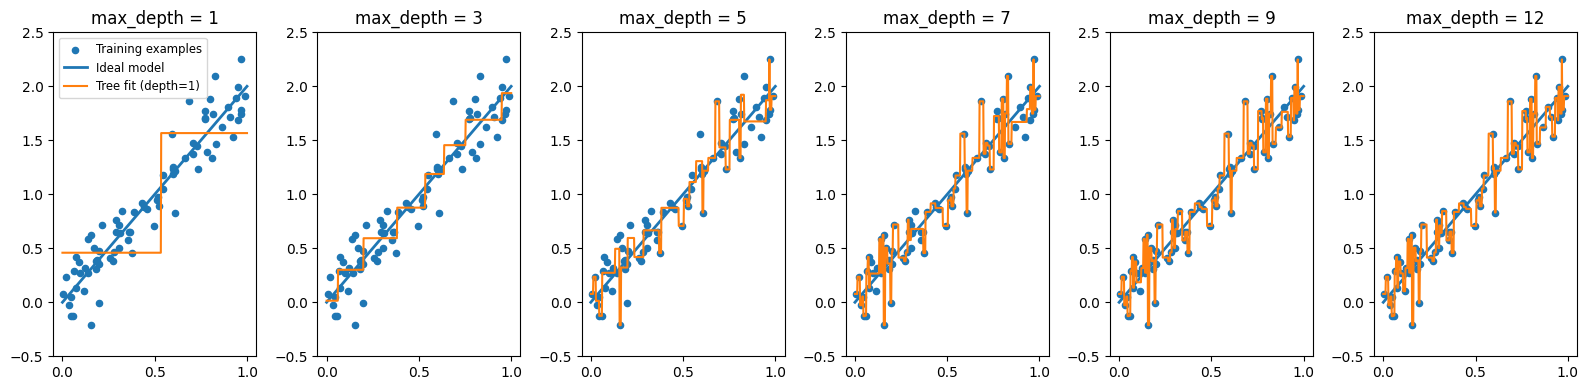

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# — Datos sintéticos lineales + ruido —
rng = np.random.RandomState(42)
X_plot = np.sort(rng.rand(80))
y_plot = 2 * X_plot + rng.randn(80) * 0.2  # línea ideal: y = 2·x

# Valores de max_depth a comparar
depths = [1, 3, 5, 7, 9, 12]

plt.figure(figsize=(16, 4))

for i, d in enumerate(depths, 1):
    ax = plt.subplot(1, len(depths), i)
    
    # 1) Entrena árbol regresor con max_depth=d
    reg = DecisionTreeRegressor(max_depth=d, random_state=42)
    reg.fit(X_plot.reshape(-1, 1), y_plot)
    
    # 2) Predicciones finas sobre todo el rango de x
    X_test_plot = np.linspace(0, 1, 500).reshape(-1, 1)
    y_pred = reg.predict(X_test_plot)
    
    # 3) Gráfica de puntos, línea ideal y función escalonada del árbol
    ax.scatter(X_plot, y_plot, s=20, label="Training examples")
    ax.plot(X_test_plot, 2 * X_test_plot,   label="Ideal model", linewidth=2)
    ax.plot(X_test_plot, y_pred,           label=f"Tree fit (depth={d})", linewidth=1.5)
    
    ax.set_title(f"max_depth = {d}")
    ax.set_ylim(-0.5, 2.5)
    if i == 1:
        ax.legend(loc="upper left", fontsize="small")

plt.tight_layout()
plt.show()


In [55]:
fixed_params = {
    'min_samples_leaf': 5,
    'min_samples_split': 50,
    'ccp_alpha': 0.0028,
    'criterion': 'entropy',
    'random_state': 42
}

for d in [5,7,9,12]:
    clf = DecisionTreeClassifier(max_depth=d, **fixed_params)
    clf.fit(X_train, y_train)
    y_val_pred = clf.predict(X_val)
    print(f"depth={d} → recall_dropout={recall_score(y_val, y_val_pred, average=None)[0]:.4f}")


depth=5 → recall_dropout=0.7023
depth=7 → recall_dropout=0.7318
depth=9 → recall_dropout=0.7341
depth=12 → recall_dropout=0.7364


   max_depth  recall_train  recall_val
0          3      0.689394    0.713636
1          5      0.669697    0.700000
2          7      0.721212    0.731818
3          9      0.777273    0.754545
4         12      0.775000    0.754545
5         15      0.775000    0.754545


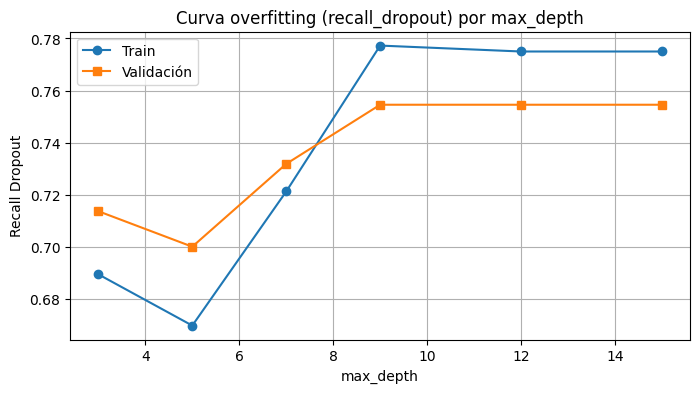

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Parámetros fijos de tu mejor modelo
fixed = {
    'criterion': 'entropy',
    'min_samples_leaf': 10,
    'min_samples_split': 50,
    'random_state': 42
}

# Rango de profundidades a evaluar
depths = [3, 5, 7, 9, 12, 15]

# Lista de tuplas (train_recall, val_recall)
results = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, **fixed)
    clf.fit(X_train, y_train)

    r_train = recall_score(y_train, clf.predict(X_train), average=None)[0]
    r_val   = recall_score(y_val,   clf.predict(X_val),   average=None)[0]
    results.append((d, r_train, r_val))

# Convertimos a DataFrame para verlo de un vistazo
df_res = pd.DataFrame(results, columns=['max_depth','recall_train','recall_val'])
print(df_res)

# Y luego el gráfico de overfitting
plt.figure(figsize=(8,4))
plt.plot(df_res['max_depth'], df_res['recall_train'], marker='o', label='Train')
plt.plot(df_res['max_depth'], df_res['recall_val'],   marker='s', label='Validación')
plt.xlabel('max_depth')
plt.ylabel('Recall Dropout')
plt.title('Curva overfitting (recall_dropout) por max_depth')
plt.legend()
plt.grid(True)
plt.show()


   max_depth  recall_train  recall_val
0          3      0.684091    0.693182
1          5      0.721970    0.722727
2          7      0.768939    0.750000
3          9      0.781818    0.763636
4         12      0.796970    0.777273
5         15      0.802273    0.777273


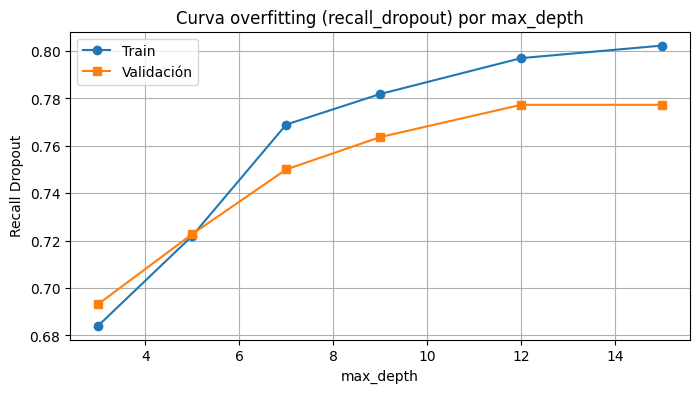

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

# Parámetros fijos de tu mejor modelo
fixed = {
    'criterion': 'gini',
    'min_samples_leaf': 10,
    'min_samples_split': 50,
    'random_state': 42
}

# Rango de profundidades a evaluar
depths = [3, 5, 7, 9, 12, 15]

# Lista de tuplas (train_recall, val_recall)
results = []
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, **fixed)
    clf.fit(X_train, y_train)

    r_train = recall_score(y_train, clf.predict(X_train), average=None)[0]
    r_val   = recall_score(y_val,   clf.predict(X_val),   average=None)[0]
    results.append((d, r_train, r_val))

# Convertimos a DataFrame para verlo de un vistazo
df_res = pd.DataFrame(results, columns=['max_depth','recall_train','recall_val'])
print(df_res)

# Y luego el gráfico de overfitting
plt.figure(figsize=(8,4))
plt.plot(df_res['max_depth'], df_res['recall_train'], marker='o', label='Train')
plt.plot(df_res['max_depth'], df_res['recall_val'],   marker='s', label='Validación')
plt.xlabel('max_depth')
plt.ylabel('Recall Dropout')
plt.title('Curva overfitting (recall_dropout) por max_depth')
plt.legend()
plt.grid(True)
plt.show()


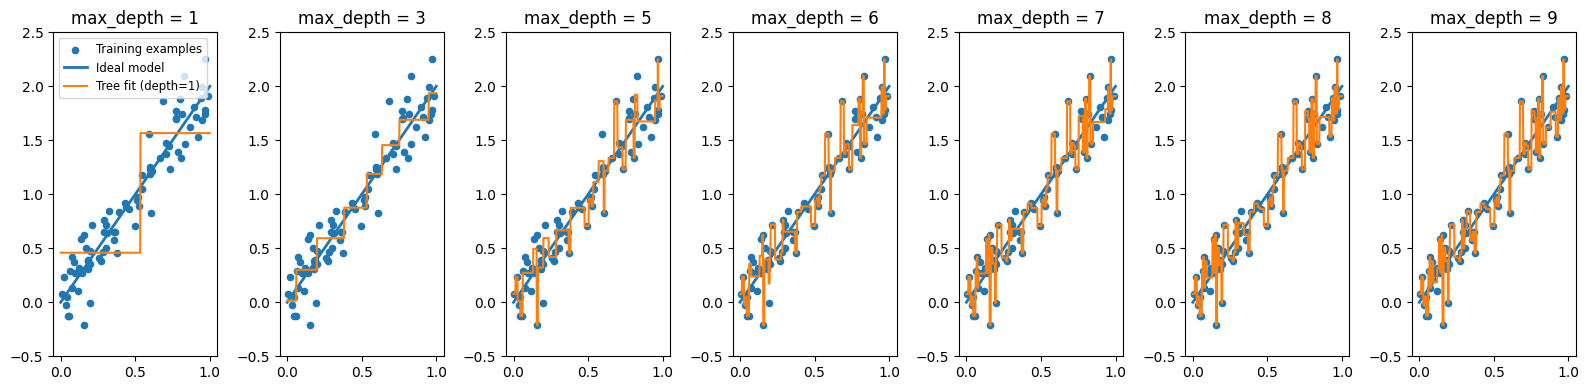

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# — Datos sintéticos lineales + ruido —
rng = np.random.RandomState(42)
X_plot = np.sort(rng.rand(80))
y_plot = 2 * X_plot + rng.randn(80) * 0.2  # línea ideal: y = 2·x

# Valores de max_depth a comparar
depths = [1, 3, 5, 6,7,8, 9]

plt.figure(figsize=(16, 4))

for i, d in enumerate(depths, 1):
    ax = plt.subplot(1, len(depths), i)
    
    # 1) Entrena árbol regresor con max_depth=d
    reg = DecisionTreeRegressor(max_depth=d, random_state=42)
    reg.fit(X_plot.reshape(-1, 1), y_plot)
    
    # 2) Predicciones finas sobre todo el rango de x
    X_test_plot = np.linspace(0, 1, 500).reshape(-1, 1)
    y_pred = reg.predict(X_test_plot)
    
    # 3) Gráfica de puntos, línea ideal y función escalonada del árbol
    ax.scatter(X_plot, y_plot, s=20, label="Training examples")
    ax.plot(X_test_plot, 2 * X_test_plot,   label="Ideal model", linewidth=2)
    ax.plot(X_test_plot, y_pred,           label=f"Tree fit (depth={d})", linewidth=1.5)
    
    ax.set_title(f"max_depth = {d}")
    ax.set_ylim(-0.5, 2.5)
    if i == 1:
        ax.legend(loc="upper left", fontsize="small")

plt.tight_layout()
plt.show()
